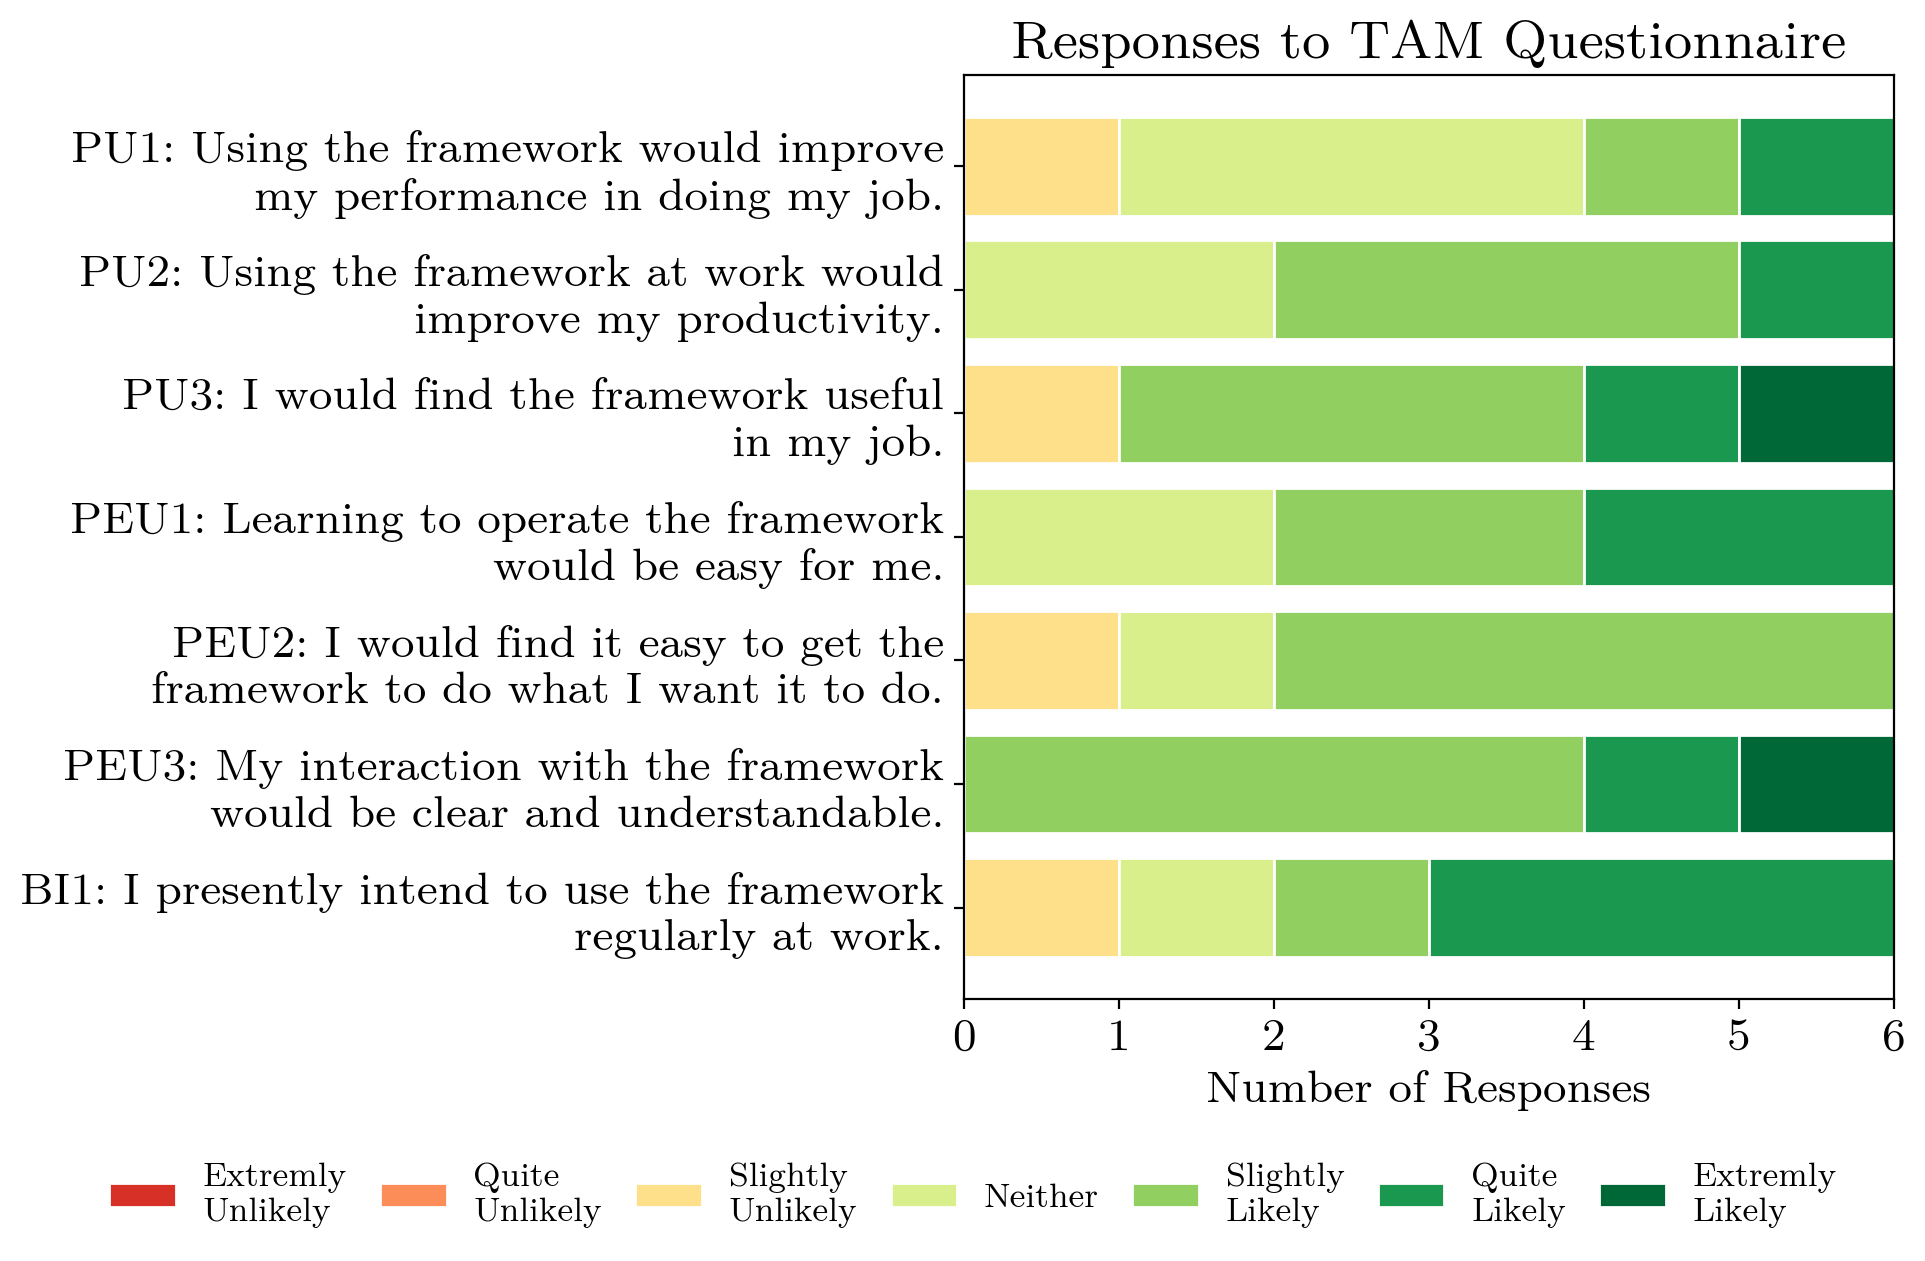

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tam_questionniare_data = pd.read_csv('./tam-questionnaire-responses.csv')

plt.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams.update({'font.size': 16})

response_mapping = {
    1: "Extremly\nUnlikely",
    2: "Quite\nUnlikely",
    3: "Slightly\nUnlikely",
    4: "Neither",
    5: "Slightly\nLikely",
    6: "Quite\nLikely",
    7: "Extremly\nLikely",
}

question_mapping = {
    "PU1": "PU1: Using the framework would improve\nmy performance in doing my job.",
    "PU2": "PU2: Using the framework at work would\nimprove my productivity.",
    "PU3": "PU3: I would find the framework useful\nin my job.",
    "PEU1": "PEU1: Learning to operate the framework\nwould be easy for me.",
    "PEU2": "PEU2: I would find it easy to get the\nframework to do what I want it to do.",
    "PEU3": "PEU3: My interaction with the framework\nwould be clear and understandable.",
    "BI1": "BI1: I presently intend to use the framework\nregularly at work."
}

tam_questionniare_data.rename(columns=question_mapping, inplace=True)
question_order = list(tam_questionniare_data.columns.drop("participant"))[::-1]
response_counts = (
    tam_questionniare_data.drop(columns=["participant"])
    .applymap(response_mapping.get)
    .melt(var_name="Question", value_name="Response")
    .value_counts()
    .unstack(fill_value=0)
    .reindex(index=question_order)
)

colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850', '#006837']

fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
bottom = np.zeros(len(response_counts))
for i, label in enumerate(response_mapping.values()):
    values = response_counts.get(label, [0] * len(response_counts))
    ax.barh(response_counts.index, values, left=bottom, color=colors[i], edgecolor='white', label=label)
    bottom += values
ax.legend(loc='lower center', bbox_to_anchor=(0.01, -0.28), ncol=7, frameon=False, fontsize=12, columnspacing=1)
ax.set_xlabel("Number of Responses")
ax.set_title("Responses to TAM Questionnaire")

plt.savefig('tam-questionnaire-responses.png', bbox_inches='tight')
plt.show()